In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people

from sklearn.linear_model import LinearRegression

from sklearn.decomposition import NMF

from sklearn.model_selection import cross_val_score, KFold


import warnings
warnings.simplefilter('ignore')

from sklearn.cluster import KMeans

np.random.seed(0)

dow_jones = pd.read_csv("dow_jones_index.data")

V = dow_jones.pivot(index = "stock", columns = "date", values = "close")

V = V.replace('[\$,]', '', regex=True).astype(float)
# V transpose has columns as stocks (examples) and rows as dates (features)
V= V.T
V.head()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
1/14/2011,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
1/21/2011,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
1/28/2011,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
1/7/2011,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2/11/2011,17.37,46.75,72.14,14.77,103.54,18.70,96.45,54.58,43.41,21.33,...,33.07,27.25,18.83,64.73,28.47,58.99,85.20,36.39,55.69,82.82


In [7]:
from sklearn.metrics import r2_score

k_range = [int(k) for k in np.linspace(1, 30, 30)]

error_list = list()

n_test = 10

for i in k_range:

    local_score = list()
    
    for j in range(n_test):
        
        cv_scores = list()

        kf = KFold(3, shuffle=False)

        for train_index, test_index in kf.split(V.T):
            V_train, V_test = V.iloc[:, train_index], V.iloc[:, test_index]        

            model = NMF(n_components=i, init='random')

            W_train = model.fit_transform(V)

            linear = LinearRegression(fit_intercept = False)
            linear.fit(W_train, V_test)

            H = linear.coef_

            reco = np.dot(W_train, H.T)

            r2 = r2_score(V_test, reco)

            cv_scores.append(r2)
        
        local_score.append(np.sum(cv_scores) / 3)
    
    error_list.append(np.sum(local_score)/n_test)

print("done")

done


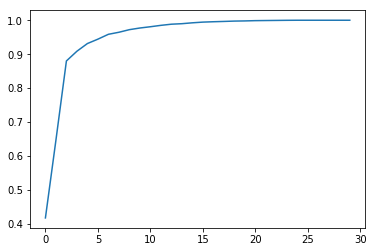

In [8]:
fig = plt.figure()
plt.plot(error_list)
fig

In [9]:
min_var = 0.95
valid_k_inds = [i for i, v in enumerate(error_list) if v >= min_var]

best_k = k_range[valid_k_inds[0]]

In [10]:
best_k

7